# Pipelines

In [1]:
%run "./Getting started.ipynb"
import requests
base_url = 'http://localhost:6000'
while True:
    try:
        r=requests.get(base_url)
        if r.text == 'EMERGENT API':
            break
    except:
        continue
print(r.text)

/Users/robbiefasano/emergent/emergent
Overwriting /Users/robbiefasano/emergent/emergent/networks/test/things/test_thing.py
Overwriting /Users/robbiefasano/emergent/emergent/networks/test/hubs/test_hub.py
Overwriting /Users/robbiefasano/emergent/emergent/networks/test/network.py
DataDict([('thing', {'X': None, 'Y': None})])
New state: DataDict([('thing', {'X': 1, 'Y': 2})])
 * Serving Flask app "emergent.API.API" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
EMERGENT API


The Pipeline class allows us to combine multiple optimization processes into a single process. For example, we could do a coarse grid search to obtain an initial signal, then shrink the bounds to enclose the signal and sample with higher resolution, then finally fit all observed data to a model which predicts the location of the maximum:

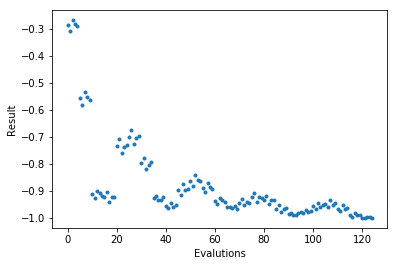

[0.2978934  0.61479629] -0.999608689562411
done


In [5]:
import numpy as np
from emergent.pipeline import (Pipeline, Source, GridSearch, GaussianModel, Rescale, DifferentialEvolution, 
                              ParticleSwarm, GaussianProcess, GradientDescent, Adam, LBFGSB)
from emergent.utilities.containers import DataDict

''' Define data source '''
hub = network.hubs['hub']
hub.range = DataDict({'thing': {'X': {'min': 0, 'max': 1}, 'Y': {'min': 0, 'max': 1}}})
thing = hub.children['thing']
state = {'thing': {'X': 0, 'Y': 1}}
bounds = hub.range.copy()
experiment = hub.gaussian
params = {'sigma_x': 0.3, 'sigma_y': 0.8, 'x0': 0.3, 'y0': 0.6, 'noise':0.0}
source = Source(state, bounds, experiment, params)

''' Declare and run pipeline.  Allowed blocks are:
    Sampling methods: GridSearch, DifferentialEvolution, ParticleSwarm
    Models: GaussianModel
    Other: Rescale '''
pipe = Pipeline(state, source)

# pipe.add(LBFGSB())
# pipe.add(GridSearch(params={'Steps': 5}))
# pipe.add(Rescale(threshold=0.75))

pipe.add(Adam())

# pipe.add(GridSearch(params={'Steps':10}))
# pipe.add(GaussianProcess(optimizer = DifferentialEvolution()))




points, costs = pipe.run()
pipe.plot()
print(points[-1], costs[-1])
print('done')


In [ ]:
pipe.blocks[0].plot()


In [ ]:
pipe.list_optimizers()